<a href="https://colab.research.google.com/github/ozcanmiraay/capstone/blob/main/CP192_Capstone_Proposal_%26_Completed_Work_MCS_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Monte Carlo Simulation-Based Solar Energy Investment Scenario

As a final project for my CS166: Simulation and Modeling of Complex Systems class, I built a Monte Carlo-based stock market simulation with fundamental analysis and compared different investment approaches based on investor persona. For the completed work products for my capstone proposal, I decided to repurpose that assignment by modifying my skeleton simulations to build an MVP to demonstrate my ability to work complex simulations.

In [ ]:
# Libraries

import random
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

**Here is a breakdown of the simulation I implemented below:**

- It fundamentally supports the feasibility of my proposed capstone project by demonstrating a practical approach to modeling and analyzing the economic variables that impact solar energy investments. Using classes like `EconomicIndicator` and `SolarProject` to represent and manage fluctuations in key economic factors such as subsidy rates, material costs, and sunlight hours showcases my ability to embed complex economic realities into a manageable computational framework.

- The simulation conveys the unpredictable nature of real-world economic environments by initializing and updating economic conditions with random fluctuations (`update()` method in `EconomicIndicator`). This dynamic modeling helps validate the underlying assumptions of my project about the impact of economic variability on solar energy projects.

- The `calculate_profit` method within the `SolarProject` class provides a clear example of how different economic indicators can directly affect the profitability of solar investments. This method's implementation is highly relevant to my project's aim to develop tools to predict financial outcomes under various economic scenarios, thereby supporting informed investment decisions.

- Utilizing simple yet effective histograms to visualize the distribution of profits helps stakeholders understand the potential financial returns and risks associated with solar energy investments. This visual representation is crucial for your project's goal to make complex data accessible and actionable for investors and policymakers.

- This initial simulation acts as a proof of concept that not only is the proposed analytical framework viable but also capable of providing insightful data-driven outputs. As discussed in my project proposal, it lays a solid foundation for expanding the simulation into more detailed and sophisticated models that can handle a broader range of variables and more complex interactions.

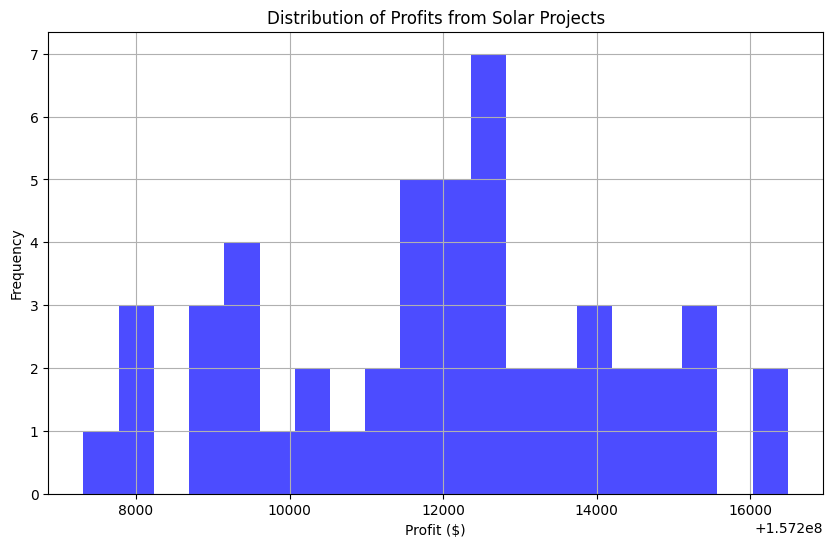

In [ ]:
# Class to represent the economic factors affecting solar projects
class EconomicIndicator:
    def __init__(self, subsidy_rate_std_dev=0.1, material_cost_std_dev=0.2, sunlight_variability_std_dev=0.05):
        """
        Initializes the EconomicIndicator with standard deviations to simulate
        the variability in subsidy rates, material costs, and sunlight hours.
        These factors significantly impact the profitability of solar energy projects.
        """
        self.subsidy_rate = np.random.normal(0.05, subsidy_rate_std_dev)  # Average subsidy rate
        self.material_cost = np.random.normal(1000, material_cost_std_dev)  # Average material cost in $/unit
        self.sunlight_hours = np.random.normal(5, sunlight_variability_std_dev)  # Average sunlight hours per day

    def update(self):
        """
        Simulates daily fluctuations in economic indicators using a random walk,
        which is crucial for modeling real-world economic uncertainties in the simulation.
        """
        self.subsidy_rate += np.random.normal(0, 0.01)
        self.material_cost += np.random.normal(0, 20)
        self.sunlight_hours += np.random.normal(0, 0.1)

# Class to represent individual solar projects in the simulation
class SolarProject:
    def __init__(self, capacity=1.0, initial_investment=500000):
        """
        Each project is initialized with a capacity (in MW) and an initial investment amount.
        The operational cost is also modeled with a normal distribution to add variability.
        """
        self.capacity = capacity
        self.initial_investment = initial_investment
        self.operational_cost = np.random.normal(10000, 2000)
        self.profit = 0  # Starting profit is set to 0

    def calculate_profit(self, economic_indicator):
        """
        Calculates the annual profit for a solar project based on the current economic conditions.
        This method is critical for evaluating the economic viability of projects over the simulation period.
        """
        revenue = economic_indicator.sunlight_hours * 365 * self.capacity * economic_indicator.subsidy_rate * self.initial_investment
        self.profit = revenue - self.operational_cost - economic_indicator.material_cost

# Class to manage the entire simulation environment
class SimulationEnvironment:
    def __init__(self, num_projects=10):
        """
        Sets up the simulation with a specified number of solar projects and initializes the economic indicators.
        """
        self.projects = [SolarProject() for _ in range(num_projects)]
        self.economic_indicator = EconomicIndicator()

    def run_simulation(self, days=365):
        """
        Runs the simulation for a specified number of days, updating economic conditions and calculating
        profits for each project daily.
        """
        for _ in range(days):
            self.economic_indicator.update()
            for project in self.projects:
                project.calculate_profit(self.economic_indicator)

    def collect_data(self):
        """
        Collects and returns data on profits, operational costs, and initial investments for all projects.
        This data is used for further analysis and visualization.
        """
        data = []
        for project in self.projects:
            project_data = {
                'profit': project.profit,
                'operational_cost': project.operational_cost,
                'initial_investment': project.initial_investment
            }
            data.append(project_data)
        return data

# Function to plot the distribution of profits from all projects
def plot_profits(simulation_data):
    """
    Visualizes the distribution of profits across all solar projects in a histogram.
    This visualization helps in understanding the potential financial outcomes of investing in solar energy.
    """
    profits = [d['profit'] for d in simulation_data]
    plt.figure(figsize=(10, 6))
    plt.hist(profits, bins=20, color='blue', alpha=0.7)
    plt.title('Distribution of Profits from Solar Projects')
    plt.xlabel('Profit ($)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Run the simulation and visualize the results
env = SimulationEnvironment(num_projects=50)
env.run_simulation(days=365)
simulation_data = env.collect_data()
plot_profits(simulation_data)

**Here is a breakdown of a sligthly different, modified simulation I implemented below:**

This modified simulation enhances the feasibility and direction of my capstone project on sustainable investment strategies for solar energy by incorporating investor decision-making into the analysis.

Introducing the `Investor` class allows for incorporating investor behavior and risk preferences into the simulation. The simulation evaluates how these factors influence investment decisions by defining investors with different risk tolerances and investment thresholds. This simulation aspect is crucial for my project's aim to develop sustainable investment strategies tailored to investors' risk preferences and financial goals.

The `SolarProject` class estimates future profits based on economic indicators, enabling a comprehensive analysis of investment opportunities. By simulating future projections with increased variability, the simulation accounts for the uncertainty surrounding future economic conditions, which is essential for evaluating the financial viability of solar projects over time.

The visualization functions provide clear insights into each investor's investment decisions and profit distributions. These visualizations aid in understanding the relationship between risk, profitability, and investment decisions, facilitating informed decision-making by investors and policymakers.

This simulation expands the analytical framework of my project by integrating investor decision-making into the evaluation of solar energy investments. The simulation lays the groundwork for developing data-driven investment strategies that balance risk and return in sustainable energy projects by demonstrating how investors' risk preferences influence investment decisions and profitability.

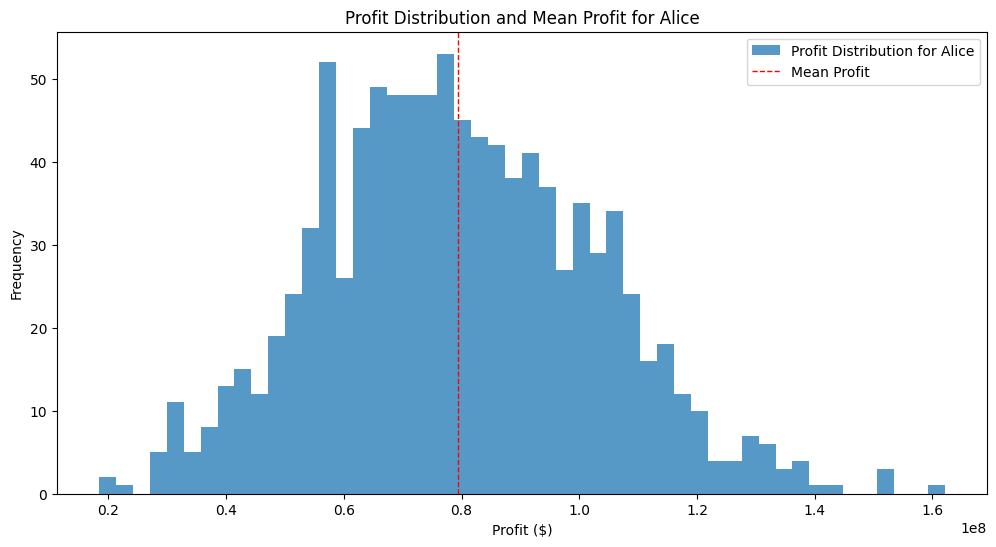

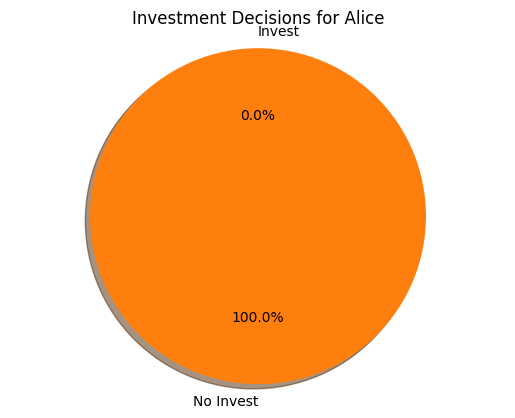

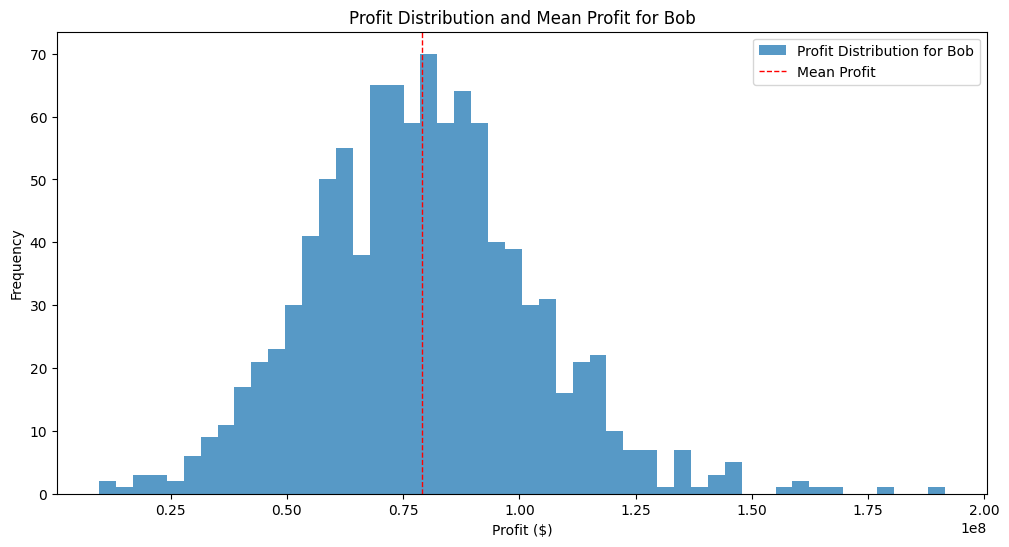

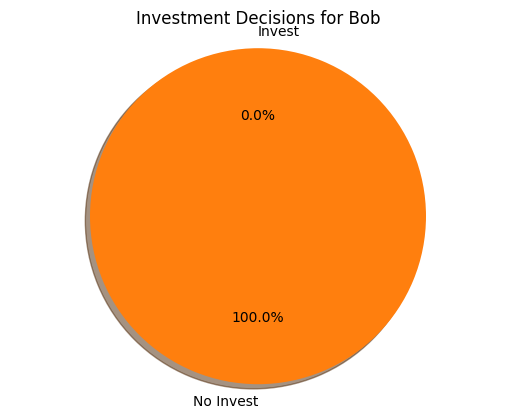

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class EconomicIndicator:
    def __init__(self):
        # Slightly higher variability in economic factors
        self.subsidy_rate = np.random.normal(0.05, 0.02)
        self.material_cost = np.random.normal(1000, 100)
        self.sunlight_hours = np.random.normal(5, 1)

    def update(self):
        self.subsidy_rate += np.random.normal(0, 0.01)
        self.material_cost += np.random.normal(0, 20)
        self.sunlight_hours += np.random.normal(0, 0.2)

class Investor:
    def __init__(self, name, risk_tolerance, investment_threshold=0.5):
        self.name = name
        self.risk_tolerance = risk_tolerance
        self.investment_threshold = investment_threshold  # Lower threshold to make investment more likely
        self.portfolio = []

    def decide_investment(self, project, economic_indicator):
        simulated_profits = [project.estimate_future_profit(economic_indicator) for _ in range(100)]
        mean_profit = np.mean(simulated_profits)
        std_dev_profit = np.std(simulated_profits)

        # Investment decision based on risk-adjusted return and variability in profits
        if mean_profit > self.risk_tolerance * project.initial_investment and std_dev_profit < mean_profit * self.investment_threshold:
            self.portfolio.append(project)
            return "Invest"
        else:
            return "No Invest", simulated_profits

class SolarProject:
    def __init__(self):
        self.initial_investment = np.random.normal(500000, 50000)
        self.operational_cost = np.random.normal(10000, 2000)

    def estimate_future_profit(self, economic_indicator):
        # More variability in future projections
        future_subsidy_rate = np.random.normal(economic_indicator.subsidy_rate, 0.02)
        future_material_cost = np.random.normal(economic_indicator.material_cost, 50)
        future_sunlight_hours = np.random.normal(economic_indicator.sunlight_hours, 0.5)
        future_revenue = future_sunlight_hours * 365 * future_subsidy_rate * self.initial_investment
        return future_revenue - self.operational_cost - future_material_cost

def run_simulation():
    economic_indicator = EconomicIndicator()
    investors = [Investor("Alice", 200000, 0.3), Investor("Bob", 150000, 0.4)]  # More aggressive investment thresholds
    projects = [SolarProject() for _ in range(10)]
    decisions = {investor.name: [] for investor in investors}
    profit_stats = {investor.name: [] for investor in investors}

    for investor in investors:
        for project in projects:
            decision, profits = investor.decide_investment(project, economic_indicator)
            decisions[investor.name].append(decision)
            profit_stats[investor.name].extend(profits)

    return decisions, profit_stats

investment_decisions, all_profits = run_simulation()

# Function to plot profit distributions and pie chart of decisions
def plot_investor_data(profits, decisions, investor_name):
    plt.figure(figsize=(12, 6))
    plt.hist(profits, bins=50, alpha=0.75, label=f'Profit Distribution for {investor_name}')
    plt.axvline(x=np.mean(profits), color='r', linestyle='dashed', linewidth=1, label='Mean Profit')
    plt.title(f"Profit Distribution and Mean Profit for {investor_name}")
    plt.xlabel('Profit ($)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # Pie chart for investment decisions
    labels = ['Invest', 'No Invest']
    sizes = [decisions.count('Invest'), decisions.count('No Invest')]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')
    plt.title(f"Investment Decisions for {investor_name}")
    plt.show()

# Visualize the results for Alice
plot_investor_data(all_profits['Alice'], investment_decisions['Alice'], 'Alice')

# Visualize the results for Bob
plot_investor_data(all_profits['Bob'], investment_decisions['Bob'], 'Bob')